In [ ]:
import pydrake
import inspect

In [ ]:
import argparse
import math
import numpy as np

from pydrake.all import (Box,
                         DiagramBuilder,
                         FindResourceOrThrow,
                         FloatingBaseType,
                         Isometry3,
                         RigidBodyTree,
                         SignalLogger,
                         Simulator,
                         VisualElement)
from pydrake.examples.compass_gait import (CompassGait, CompassGaitParams)
from underactuated import (PlanarRigidBodyVisualizer)


tree = RigidBodyTree(FindResourceOrThrow(
                        "drake/examples/compass_gait/CompassGait.urdf"),
                     FloatingBaseType.kRollPitchYaw)
params = CompassGaitParams()
R = np.identity(3)
R[0, 0] = math.cos(params.slope())
R[0, 2] = math.sin(params.slope())
R[2, 0] = -math.sin(params.slope())
R[2, 2] = math.cos(params.slope())
X = Isometry3(rotation=R, translation=[0, 0, -5.])
color = np.array([0.9297, 0.7930, 0.6758, 1])
tree.world().AddVisualElement(VisualElement(Box([100., 1., 10.]), X, color))
tree.compile()

builder = DiagramBuilder()
compass_gait = builder.AddSystem(CompassGait())

parser = argparse.ArgumentParser()
parser.add_argument("-T", "--duration",
                    type=float,
                    help="Duration to run sim.",
                    default=10.0)
#args = parser.parse_args()

visualizer = builder.AddSystem(PlanarRigidBodyVisualizer(tree,
                                                         xlim=[-8., 8.],
                                                         ylim=[-4., 4.]))
builder.Connect(compass_gait.get_output_port(1), visualizer.get_input_port(0))

diagram = builder.Build()
simulator = Simulator(diagram)
simulator.set_target_realtime_rate(1.0)
simulator.set_publish_every_time_step(True)
simulator.get_mutable_context().set_accuracy(1e-4)

state = simulator.get_mutable_context().get_mutable_continuous_state_vector()
state.SetFromVector([0., 0., 0.4, -2.])

simulator.StepTo(10)


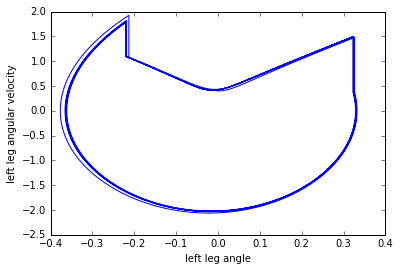

In [55]:

#import argparse
import matplotlib.pyplot as plt

from pydrake.all import (DiagramBuilder,
                         SignalLogger,
                         Simulator)
from pydrake.examples.compass_gait import (CompassGait)

# TODO(russt): combine this with simulate.py if the set_publish_every_timestep
# semantics get cleaned up (drake #7845).

builder = DiagramBuilder()
compass_gait = builder.AddSystem(CompassGait())

#parser = argparse.ArgumentParser()
#parser.add_argument("-T", "--duration",
#                    type=float,
#                    help="Duration to run sim.",
#                    default=10.0)
#args = parser.parse_args()

logger = builder.AddSystem(SignalLogger(14))
builder.Connect(compass_gait.get_output_port(1), logger.get_input_port(0))

diagram = builder.Build()
simulator = Simulator(diagram)
simulator.set_publish_every_time_step(True)
simulator.get_mutable_context().set_accuracy(1e-4)

state = simulator.get_mutable_context().get_mutable_continuous_state_vector()
state.SetFromVector([0., 0., 0.4, -2.])

simulator.StepTo(10)

plt.figure()
plt.plot(logger.data()[4, :], logger.data()[11, :])
plt.xlabel('left leg angle')
plt.ylabel('left leg angular velocity')

plt.show()


In [ ]:
from pprint import pprint

pprint(inspect.getmembers(params))
params.

In [47]:
l = [1,2,3]
t = (1,2,3)
lt = (l,t)

In [48]:
s = set((1,4,5,6))
print s

set([1, 4, 5, 6])


In [50]:
def check_validity(f):
    def wrap(*args):
        if args[0] == 0:
            return False
        return f(*args)
    return wrap

@check_validity
def division(n):
    return 100./n


In [54]:
print(check_validity)

<function check_validity at 0x7f7423f60488>
